In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.plotly as py #heat map by state tools
import plotly.tools as tls

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



['sanity_check.txt', 'states_all_extended.csv', 'aggregates', 'elsect', 'enroll_sanity_check.txt', 'nde', 'states_all.csv', 'nces_enroll']


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('../input/states_all.csv')

In [13]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

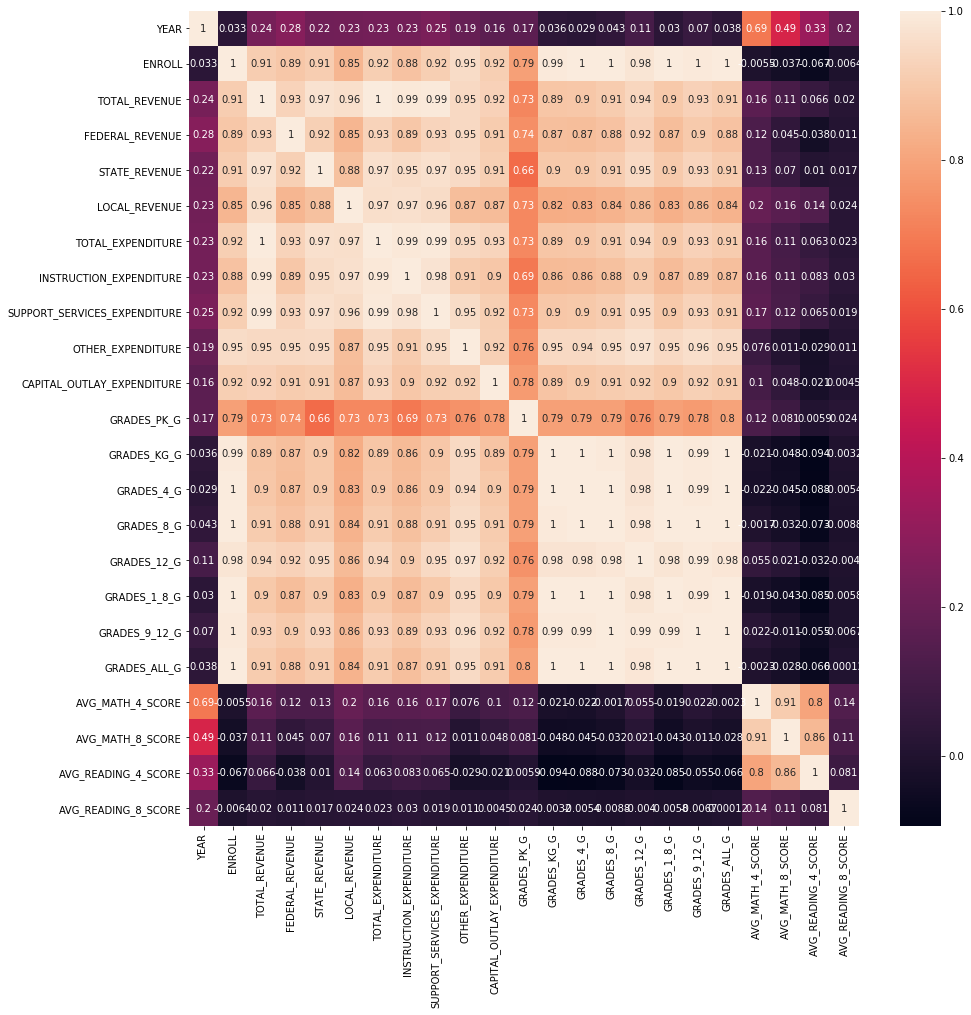

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

Text(0.5, 1.0, 'Total Revenue by State')

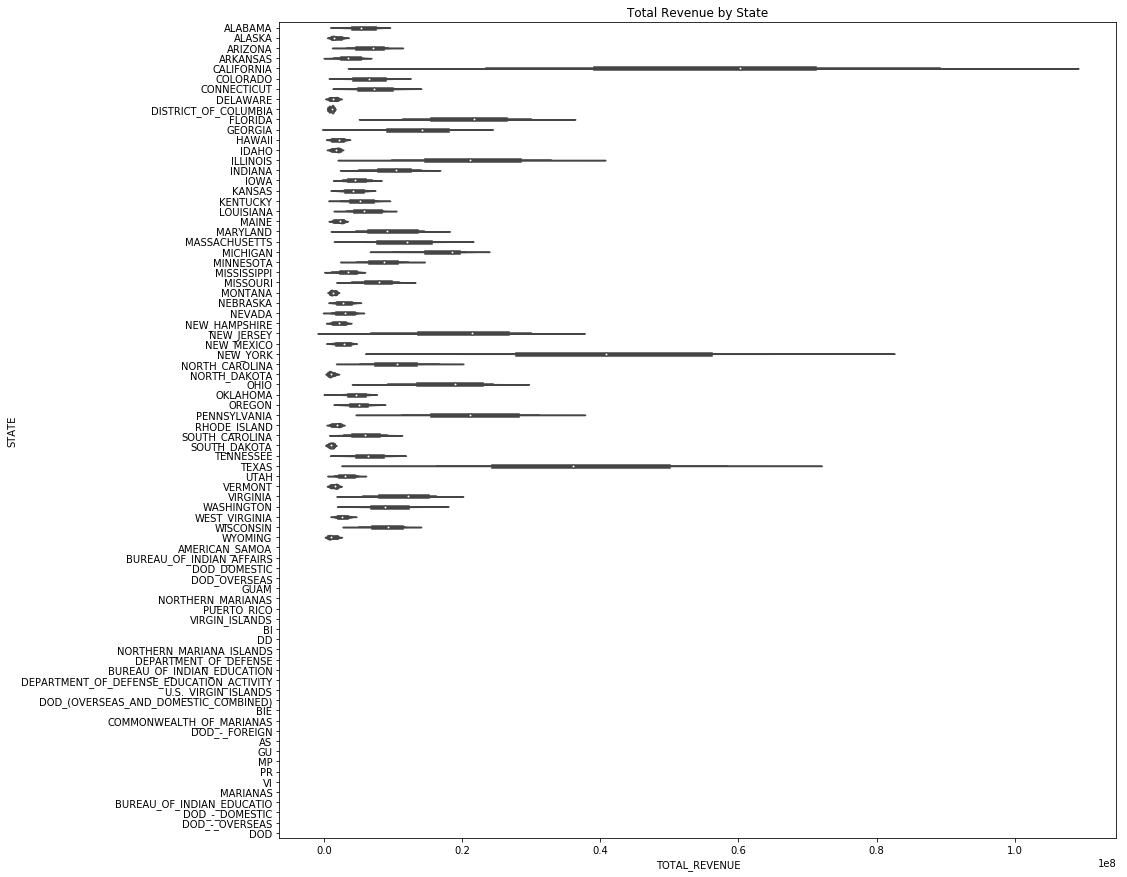

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(x="TOTAL_REVENUE", y="STATE", data=df)
ax.set_title('Total Revenue by State')

In [16]:
df['average_revenue']=df['TOTAL_REVENUE']/df['GRADES_ALL_G']
df['average_expenditure']=df['TOTAL_EXPENDITURE']/df['GRADES_ALL_G']

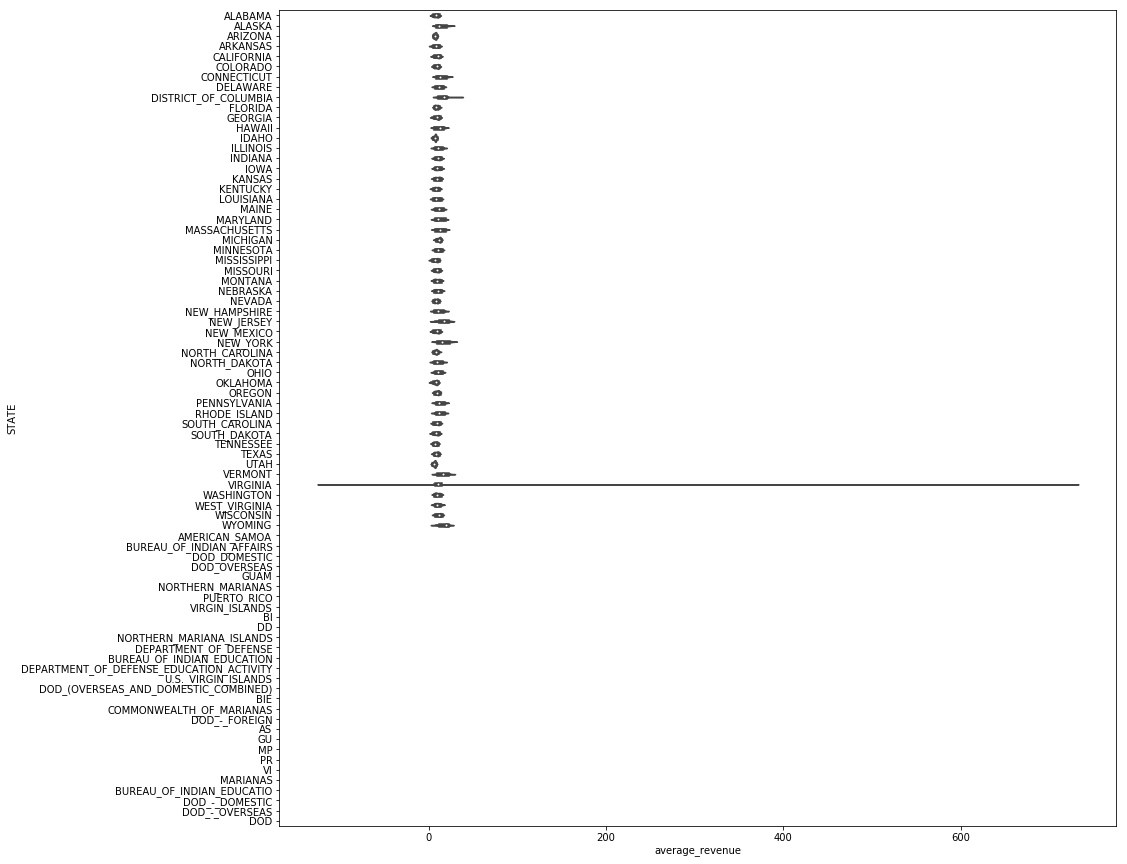

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(x="average_revenue", y="STATE", data=df[df.STATE!="Virgina"])

In [21]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,average_revenue,average_expenditure
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,3.961828,3.924726
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,9.343401,8.657035
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,5.298715,5.532095
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,4.224358,4.301008
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,5.566971,5.753273


In [27]:
states = pd.read_csv('../input/states_all.csv')
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [35]:
states['text'] = 'TOTAL REVENUE'+states['TOTAL_REVENUE'].astype(str) + 'Total Expenditure'+states['TOTAL_EXPENDITURE'].astype(str) + 'State '+states['STATE']

data = [dict(type='choropleth',autocolorscale=False, locations = states['STATE'], z= states['TOTAL_REVENUE'], locationmode='USA-states',
                text = states['text'], colorscale = 'Blues', colorbar= dict(title="Revenue by Expenditure by State"))]
data

[{'type': 'choropleth',
  'autocolorscale': False,
  'locations': 0                    ALABAMA
  1                     ALASKA
  2                    ARIZONA
  3                   ARKANSAS
  4                 CALIFORNIA
  5                   COLORADO
  6                CONNECTICUT
  7                   DELAWARE
  8       DISTRICT_OF_COLUMBIA
  9                    FLORIDA
  10                   GEORGIA
  11                    HAWAII
  12                     IDAHO
  13                  ILLINOIS
  14                   INDIANA
  15                      IOWA
  16                    KANSAS
  17                  KENTUCKY
  18                 LOUISIANA
  19                     MAINE
  20                  MARYLAND
  21             MASSACHUSETTS
  22                  MICHIGAN
  23                 MINNESOTA
  24               MISSISSIPPI
  25                  MISSOURI
  26                   MONTANA
  27                  NEBRASKA
  28                    NEVADA
  29             NEW_HAMPSHIRE
      

In [ ]:
layout = dict(title='State Expenditure vs Revenue', 
              geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes = True, lakecolor = 'rgb(66,165,245)',),)
layout

In [39]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename="State_expnd_vs_incm")

PlotlyRequestError: No message